# Name : Victor Chukwuma Nwabufo
###STUDENT ID: CA/SE1/12728

#1. **Import Libraries**

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


#2. Mount the Drive

In [2]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3. Load the Iris dataset from the internet (url) or locally, use: df = pd.read_csv('iris.csv')

In [3]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df = pd.read_csv(url, header=None, names=columns)
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [4]:
#data = "/content/drive/MyDrive/CodeAlpha/iris.csv"
#df = pd.read_csv(data)
#print(df.head())

#4. Basic overview

In [5]:
# . Basic Data Overview
print("Shape of dataset:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:\n", df.head())
print("\nData types:\n", df.dtypes)
print("\nStatistical summary:\n", df.describe())

Shape of dataset: (150, 5)

Columns: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

First 5 rows:
    sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

Data types:
 sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

Statistical summary:
        sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000  

#5. Handling missing values

In [6]:
# ---- Handling missing values ----
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


#6. Histogram of a Single Variable

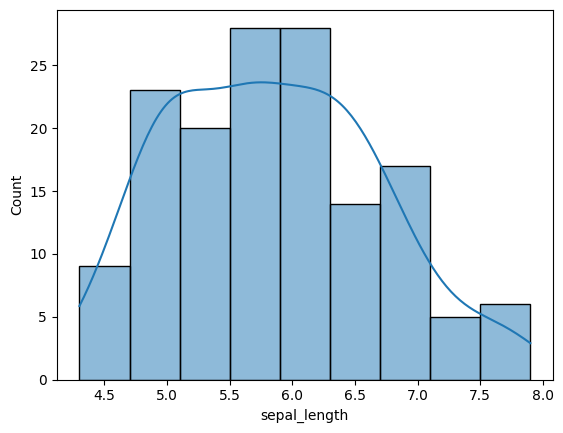

In [7]:
# Histogram of a single variable
sns.histplot(df['sepal_length'], kde=True)
plt.show()

#7. Distribution of Features

<Figure size 1000x800 with 0 Axes>

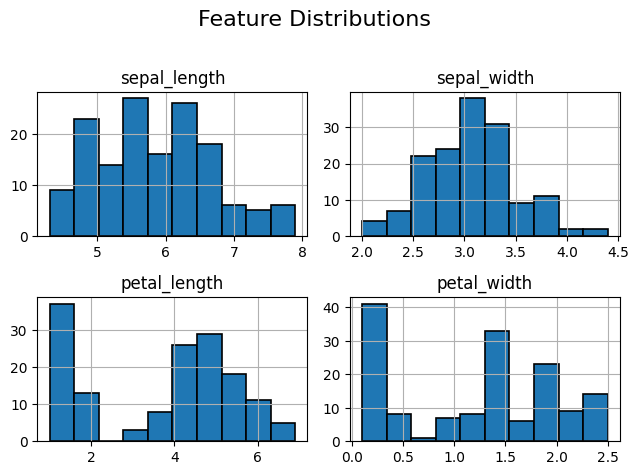

In [8]:
# . Distribution of Features
plt.figure(figsize=(10, 8))
df.hist(edgecolor='black', linewidth=1.2)
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


#8. Plot line plots for all features

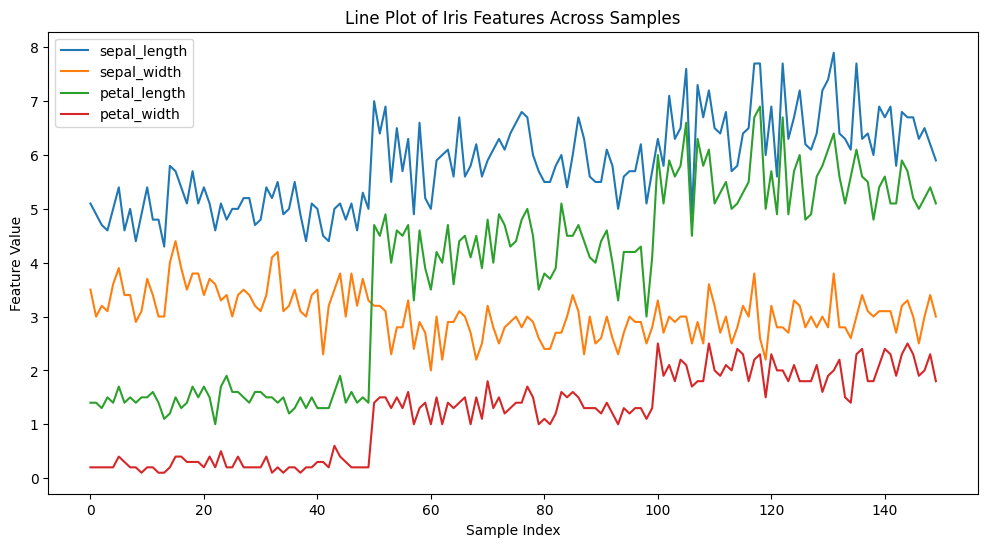

In [9]:
# Plot line plots for all features
plt.figure(figsize=(12,6))

for column in df.columns[:-1]: # Exclude the 'species' column
    plt.plot(df.index, df[column], label=column)

plt.xlabel("Sample Index")
plt.ylabel("Feature Value")
plt.title("Line Plot of Iris Features Across Samples")
plt.legend()
plt.show()

#9. Boxplots to check for outliers

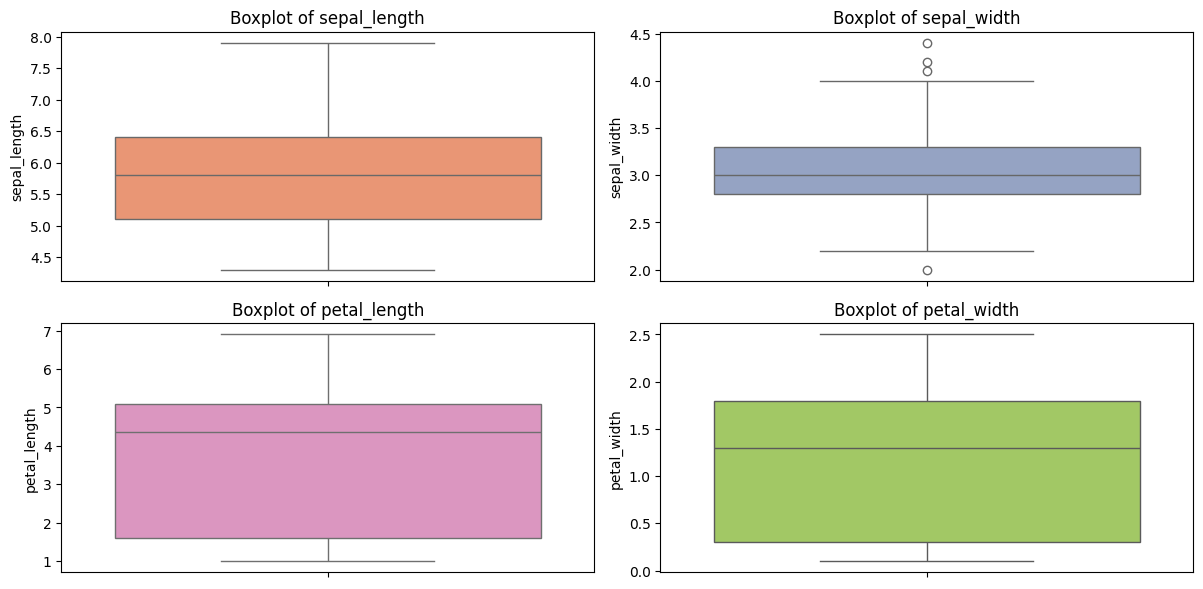

In [10]:
# . Boxplots to check for outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=df[col], color=sns.color_palette("Set2")[i])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#10. Pairplot to visualize relationships

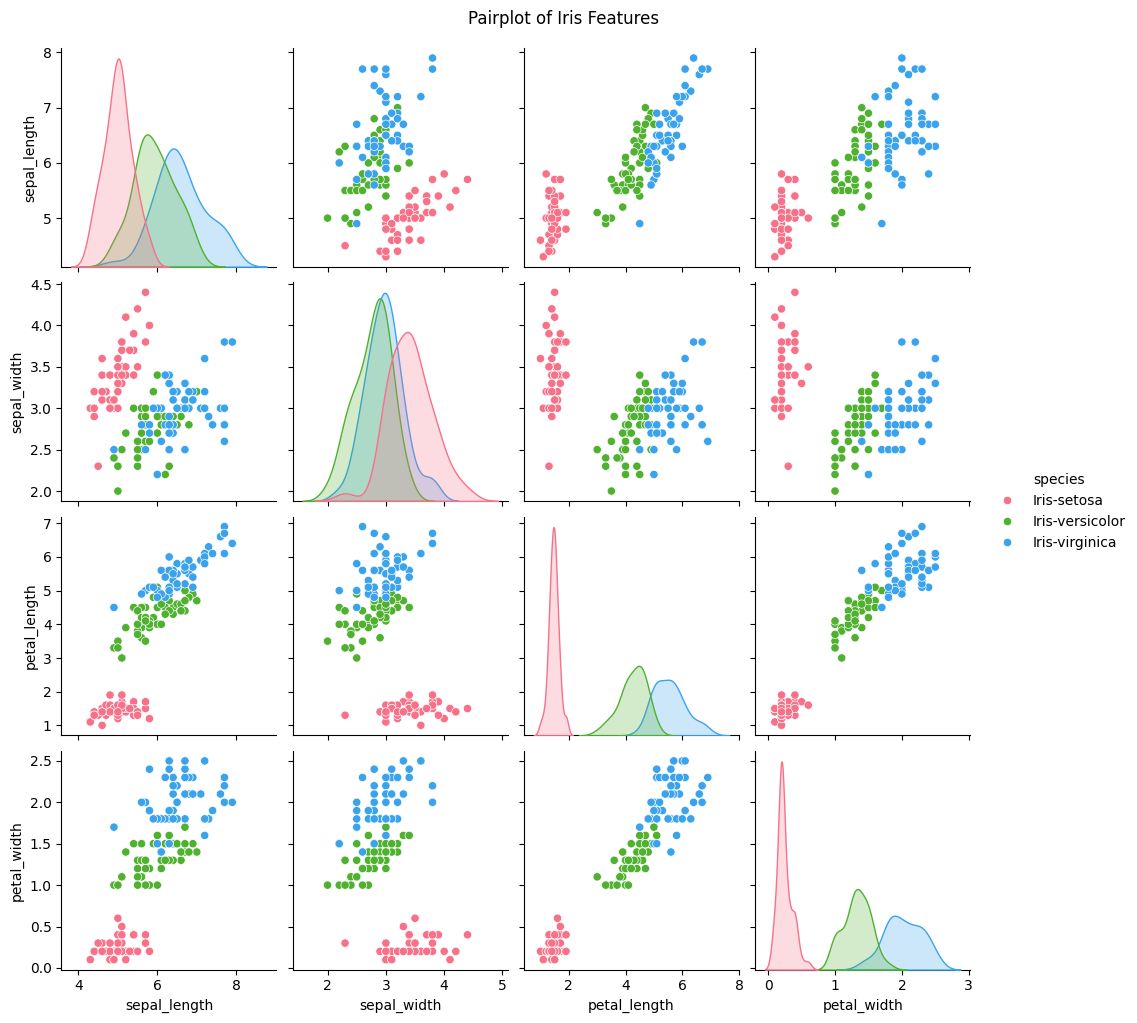

In [11]:
# Pairplot to visualize relationships
sns.pairplot(df, hue='species', diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Iris Features', y=1.02)
plt.show()


#11.  Correlation Matrix & Heatmap

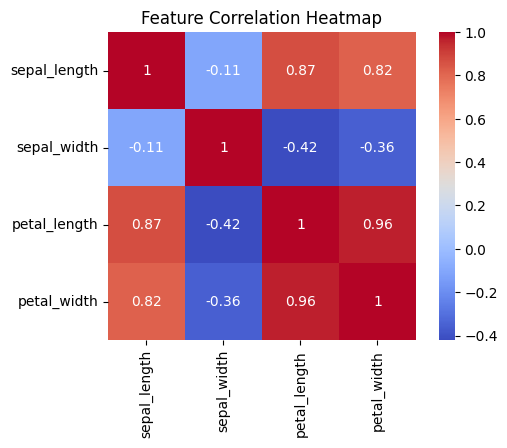

In [12]:
#  Correlation Matrix & Heatmap
# Remove rows with '...' in 'sepal_length'
df_cleaned = df[df['sepal_length'] != '...'].copy()
# Convert 'sepal_length' to numeric
df_cleaned['sepal_length'] = pd.to_numeric(df_cleaned['sepal_length'])

corr = df_cleaned.iloc[:, :-1].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', square=True)
plt.title('Feature Correlation Heatmap')
plt.show()

#12. Species Distribution

/tmp/ipython-input-3442809022.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='species', data=df, palette='pastel')


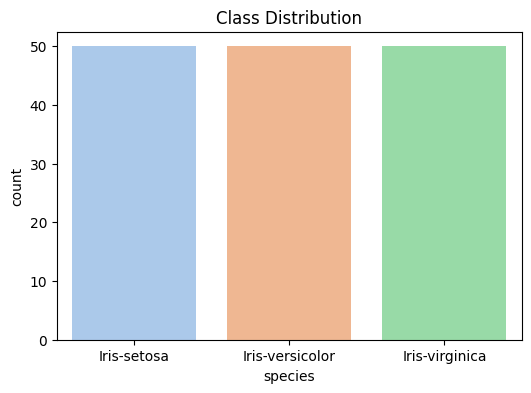

In [13]:
# Species Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df, palette='pastel')
plt.title('Class Distribution')
plt.show()

#13.  Violinplots for feature distributions by species

/tmp/ipython-input-1118038155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=col, data=df, palette='Set3')
/tmp/ipython-input-1118038155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=col, data=df, palette='Set3')
/tmp/ipython-input-1118038155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='species', y=col, data=df, palette='Set3')
/tmp/ipython-input-1118038155.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` v

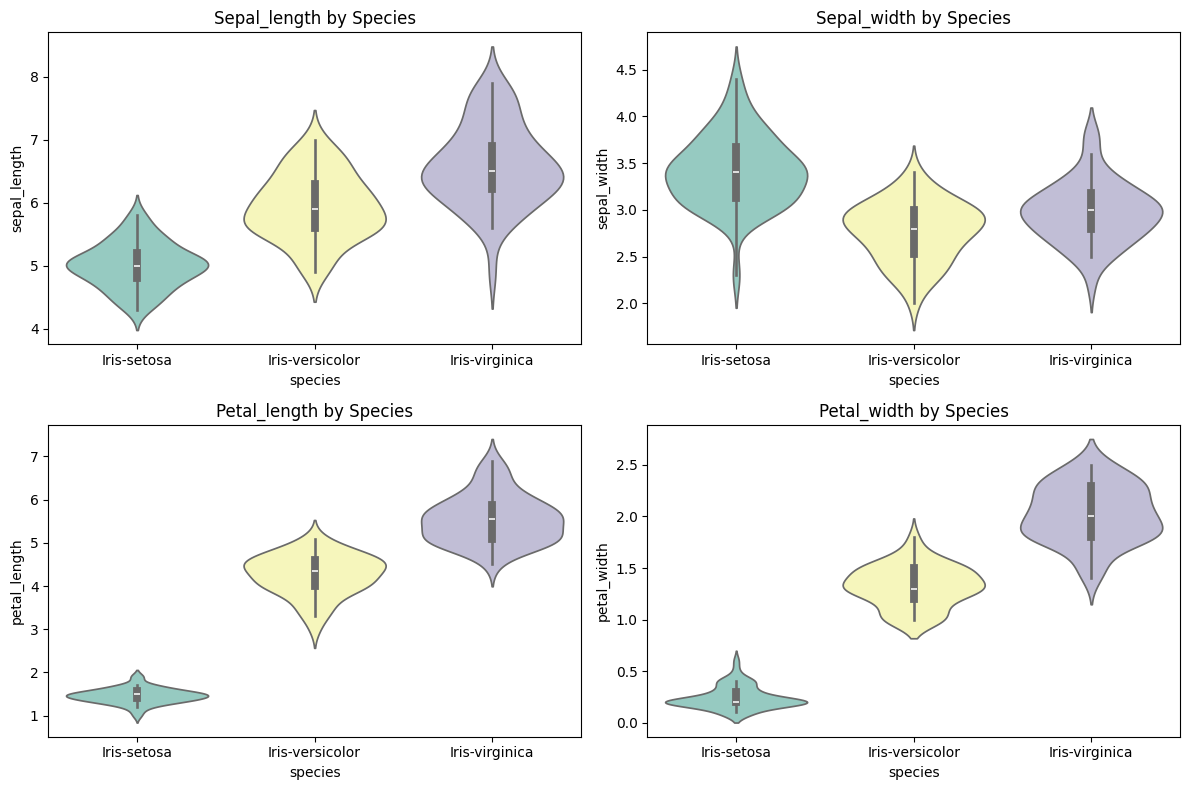

In [14]:
#  Violinplots for feature distributions by species
plt.figure(figsize=(12, 8))
for i, col in enumerate(df.columns[:-1], 1):
    plt.subplot(2, 2, i)
    sns.violinplot(x='species', y=col, data=df, palette='Set3')
    plt.title(f'{col.capitalize()} by Species')
plt.tight_layout()
plt.show()

#14. Dimensional Reduction using PCA

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
X_scaled = StandardScaler().fit_transform(X)


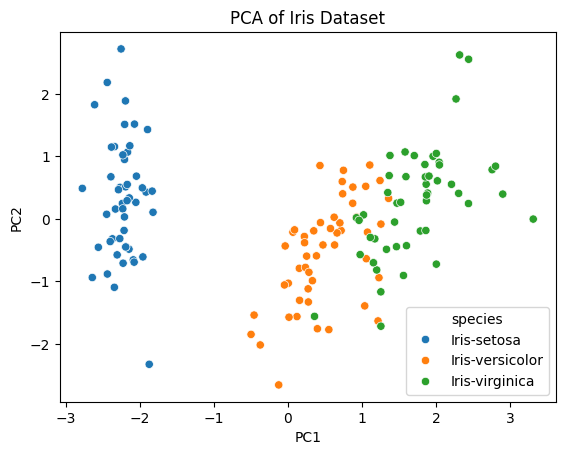

In [16]:
pca = PCA(n_components=2)  # reduce to 2 dimensions
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1','PC2'])
df_pca['species'] = df['species']
sns.scatterplot(x='PC1', y='PC2', hue='species', data=df_pca)
plt.title('PCA of Iris Dataset')
plt.show()

#15. Summary of Findings

In [17]:
# Summary of findings
print("\nSUMMARY:")
print("- The Iris dataset contains 150 samples with 4 features and 3 species.")
print("- No missing values detected in the dataset.")
print("- Some features show strong correlation in the dataset(like, petal_length and petal_width).")
print("- Feature distributions are generally well-separated by species, especially petal measurements.")
print("- Class distribution is adequately balanced across species.")



SUMMARY:
- The Iris dataset contains 150 samples with 4 features and 3 species.
- No missing values detected in the dataset.
- Some features show strong correlation in the dataset(like, petal_length and petal_width).
- Feature distributions are generally well-separated by species, especially petal measurements.
- Class distribution is adequately balanced across species.
